In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
mydata=pd.read_csv(r'D:\Teks Academy\Batsman.csv')

In [3]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [5]:
mydata.shape

(208, 7)

In [6]:
mydata.tail()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
203,140,107,3,Stumped,2,West Indies,2018
204,157,129,3,NO,1,West Indies,2018
205,107,119,3,Bowled,2,West Indies,2018
206,16,17,3,Caught,1,West Indies,2018
207,33,29,3,NO,2,West Indies,2018


In [7]:
mydata.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [8]:
mydata.describe(include='all')

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


In [9]:
mydata['Dismissal'].value_counts()

Dismissal
Caught        121
NO             37
Bowled         21
LBW            12
Run out        12
Stumped         4
Hit wicket      1
Name: count, dtype: int64

In [11]:
mydata['Dismissal'].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object', name='Dismissal')

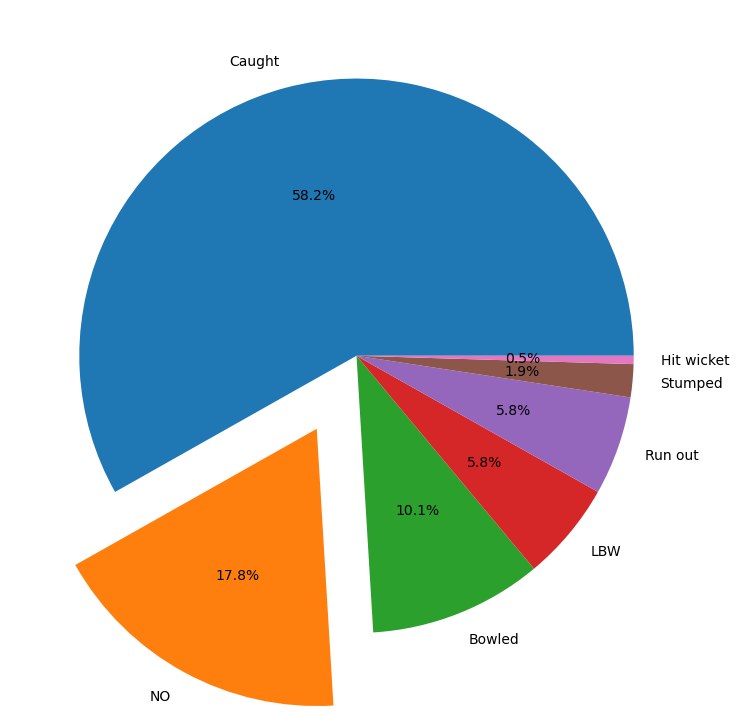

In [12]:
plt.figure(figsize=(9,9))
plt.pie(mydata['Dismissal'].value_counts(),labels=mydata['Dismissal'].value_counts().index,autopct='%1.1f%%',explode=(0,0.3,0,0,0,0,0))
plt.show()

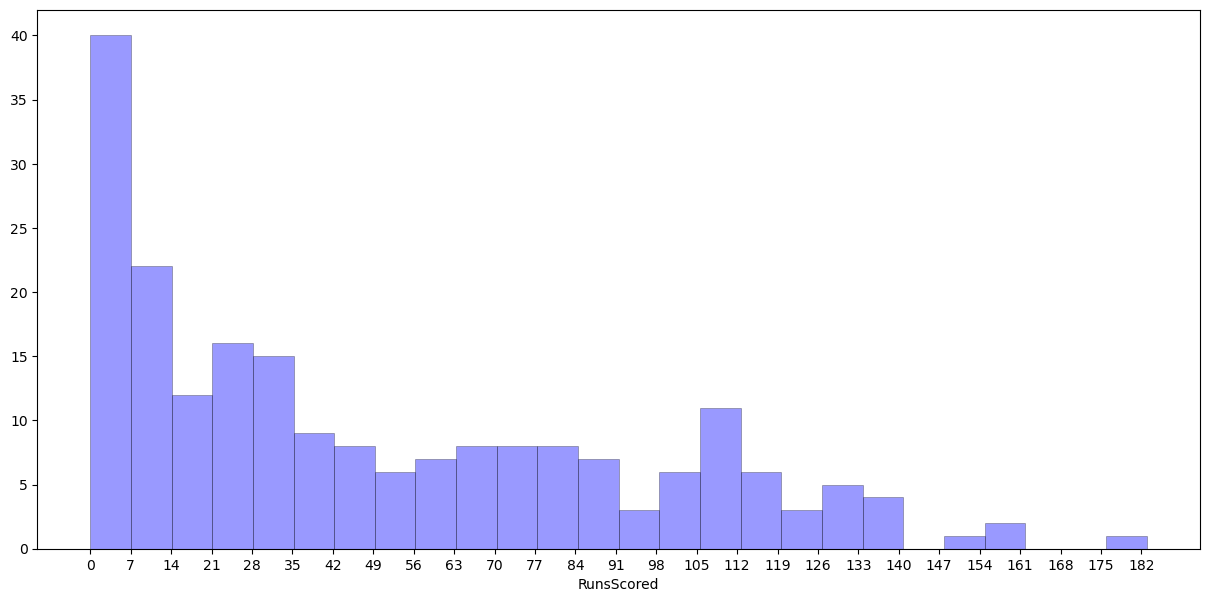

In [13]:
plt.figure(figsize=(15,7))
sns.distplot(mydata['RunsScored'],bins=26,kde=False,color='b',hist_kws={'linewidth':0.5,'edgecolor':'black'})
plt.xticks(np.arange(0,183,7))
plt.show()

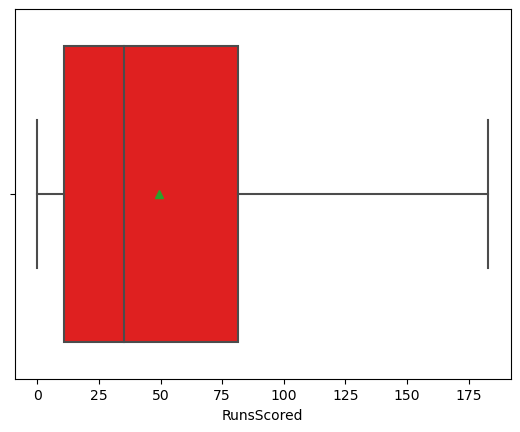

In [14]:
sns.boxplot(x='RunsScored',color='red',data=mydata,showmeans=True)
plt.show()

In [15]:
mydata['RunsScored'].quantile(.25)

10.75

In [16]:
mydata['RunsScored'].quantile(.75)

81.25

In [17]:
81.25-10.75

70.5

In [2]:
sns.boxplot(mydata['Dismissal'])
plt.show()

NameError: name 'mydata' is not defined

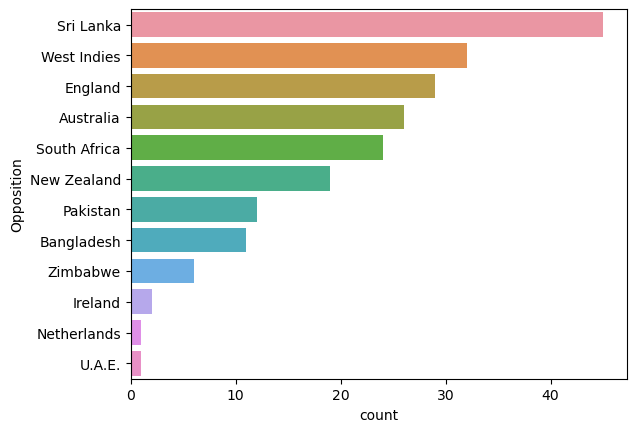

In [19]:
sns.countplot(y=mydata['Opposition'],order=mydata['Opposition'].value_counts().index)
plt.show()

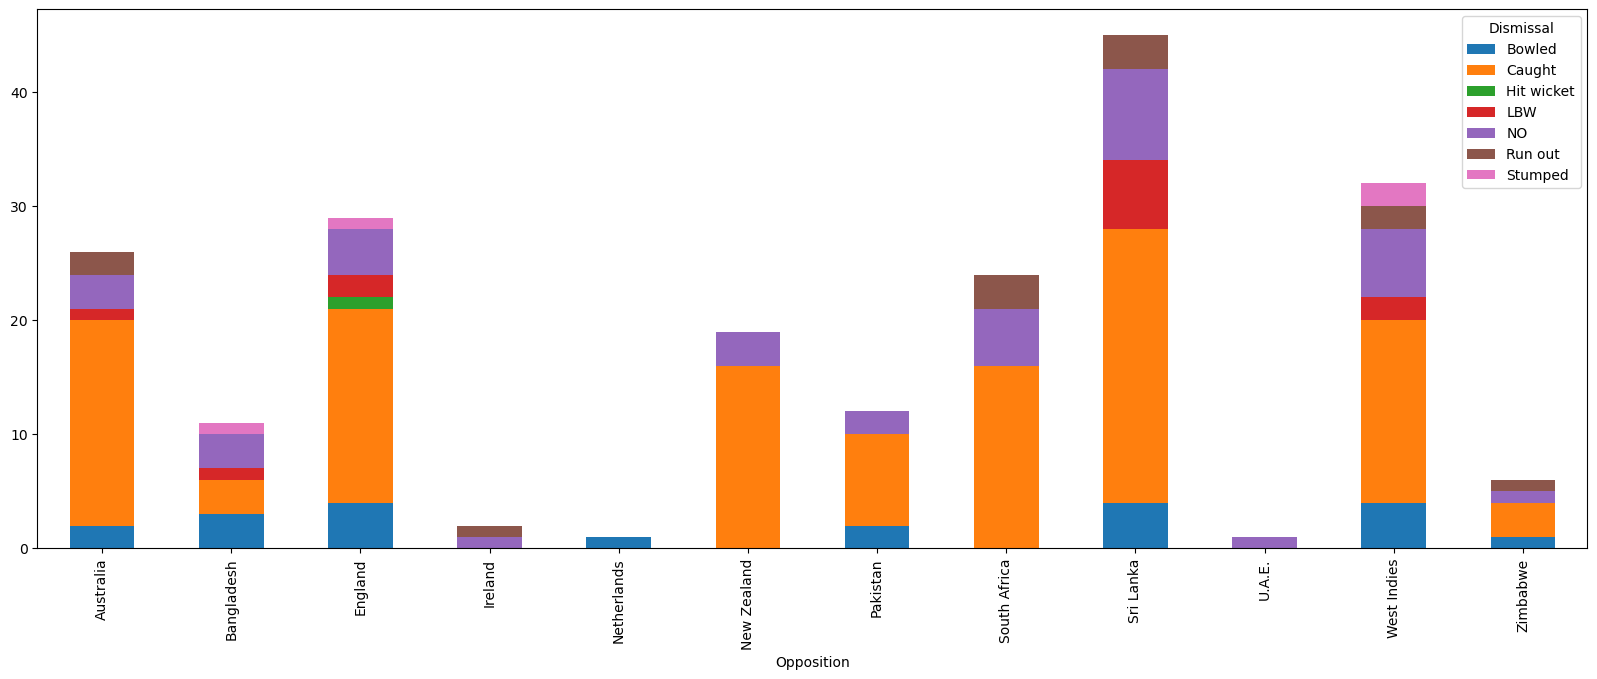

In [20]:
ct=pd.crosstab(mydata['Opposition'],mydata['Dismissal'],margins=True)
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(stacked=True,figsize=(20,7))
plt.show()

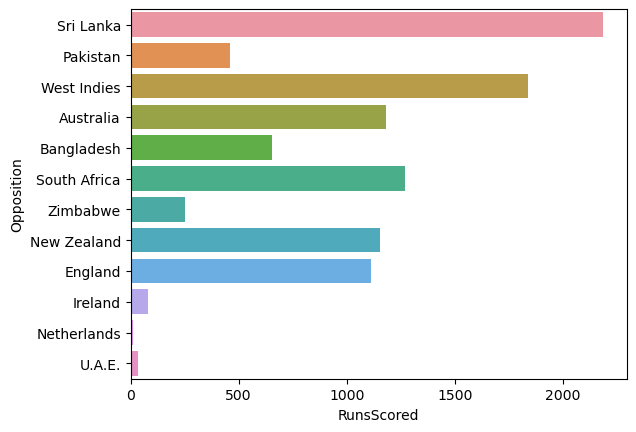

In [21]:
sns.barplot(x='RunsScored',y='Opposition',estimator=np.sum,data=mydata,ci=None)
plt.show()

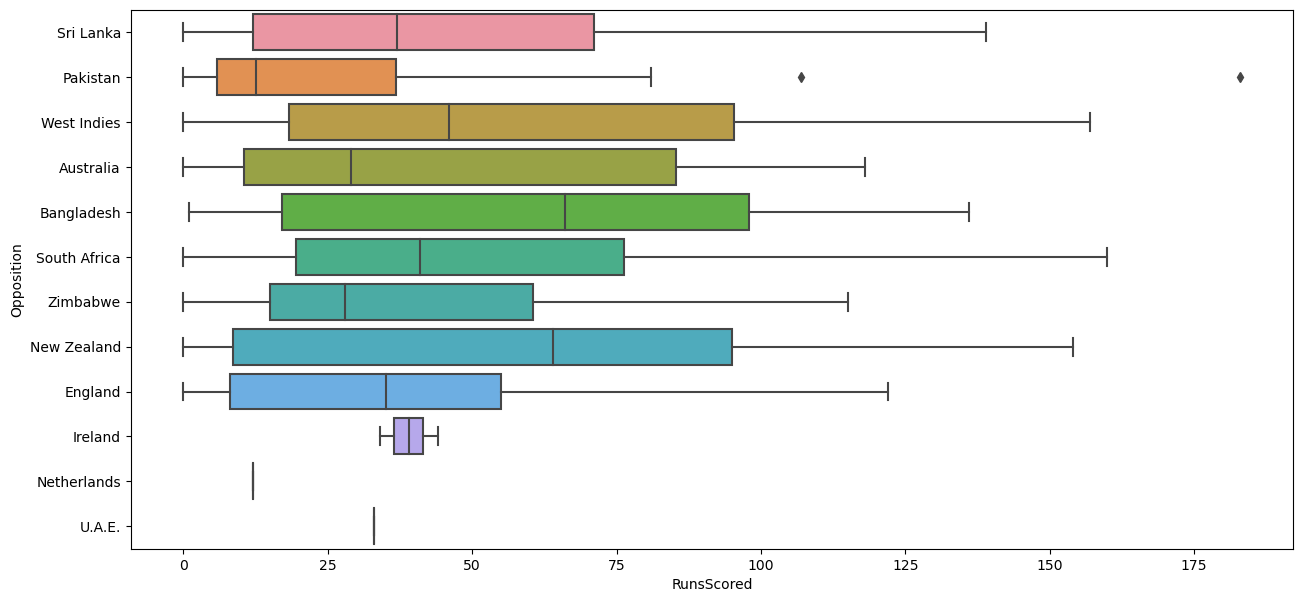

In [22]:
plt.figure(figsize=(15,7))
sns.boxplot(x='RunsScored',y='Opposition',data=mydata)
plt.show()

In [23]:
mydata[mydata['Opposition']=='Bangladesh']['RunsScored'].median()

66.0

In [24]:
mydata[mydata['Opposition']=='New Zealand']['RunsScored'].median()

64.0

In [25]:
mydata[mydata['Opposition']=='Sri Lanka']['RunsScored'].median()

37.0

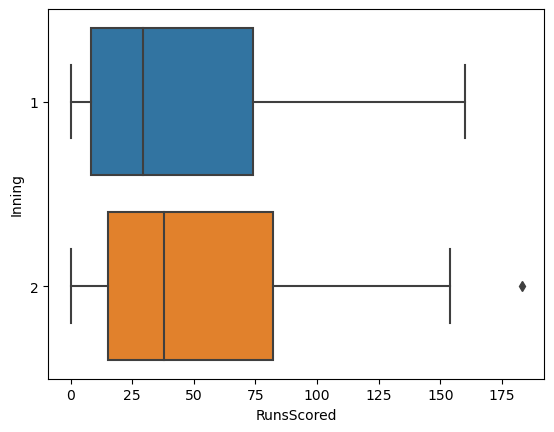

In [33]:
sns.boxplot(x='RunsScored',y='Inning',data=mydata,orient='h')
plt.show()

In [34]:
mydata['post_transform']=mydata['Year']>2012

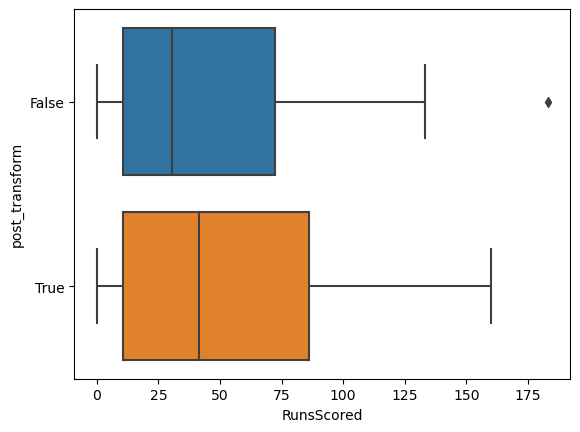

In [36]:
sns.boxplot(x='RunsScored',y='post_transform',data=mydata,orient='h')
plt.show()

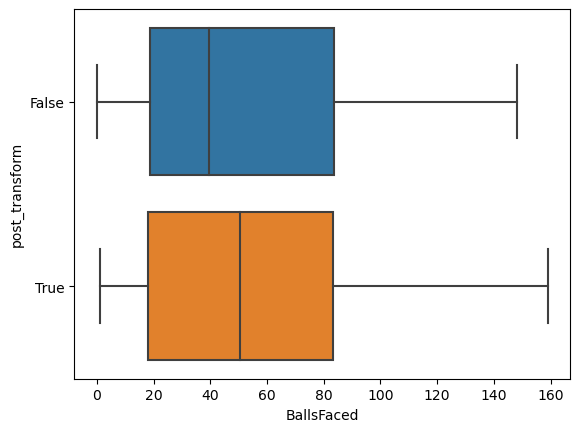

In [37]:
sns.boxplot(x='BallsFaced',y='post_transform',data=mydata,orient='h')
plt.show()

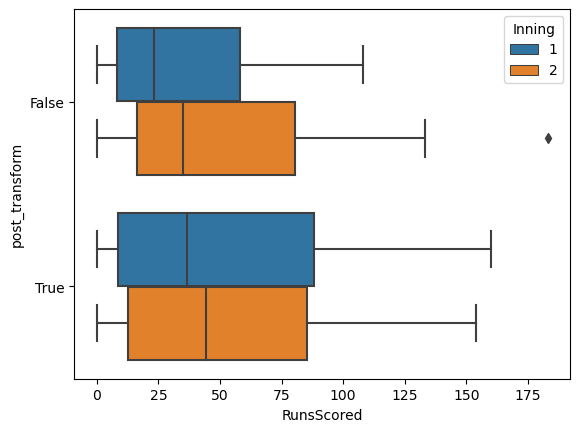

In [38]:
sns.boxplot(x='RunsScored',y='post_transform',hue='Inning',data=mydata,orient='h')
plt.show()

In [39]:
pd.crosstab(index=mydata['post_transform'],columns=mydata['Dismissal'],values=mydata['RunsScored'],margins=True,aggfunc='mean')

Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped,All
post_transform,,,,,,,,
False,27.454545,42.000000,107.0,23.750000,82.166667,42.0,16.5,44.159091
True,56.400000,42.397260,NaN,40.000000,80.480000,50.0,107.5,52.883333
All,41.238095,42.239669,107.0,29.166667,81.027027,46.0,62.0,49.192308


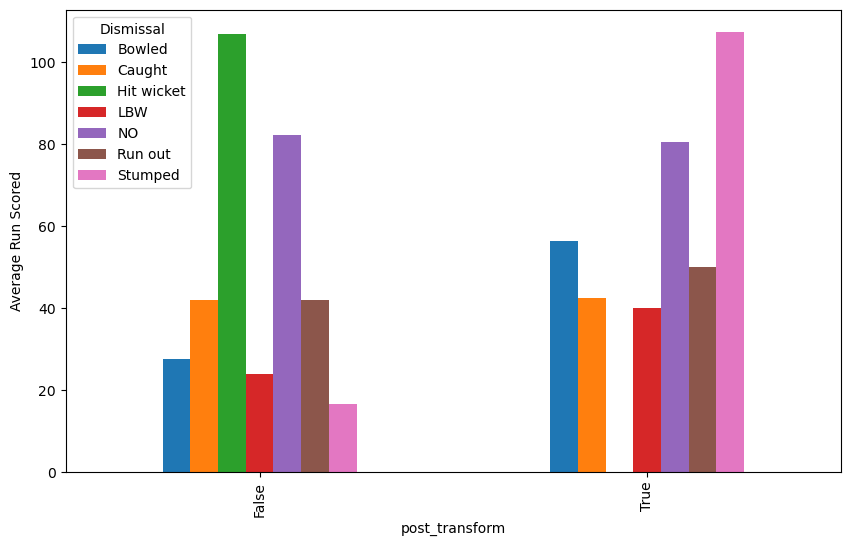

In [40]:
ct=pd.crosstab(index=mydata['post_transform'],columns=mydata['Dismissal'],values=mydata['RunsScored'],margins=True,aggfunc='mean')
ct.drop('All',inplace=True)
ct.drop('All',axis=1,inplace=True)
ct.plot.bar(figsize=(10,6))
plt.ylabel('Average Run Scored')
plt.show()

In [3]:
plt.figure(figsize=(8,6))
sns.pointplot(mydata['Year'],mydata['RunsScored'], ci=None)
plt.show()

NameError: name 'mydata' is not defined

<Figure size 800x600 with 0 Axes>

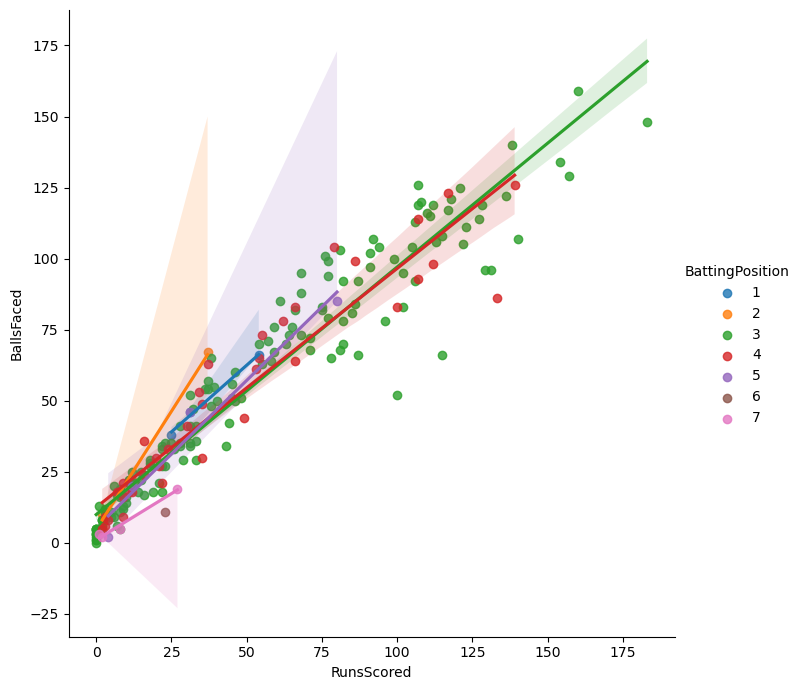

In [42]:
sns.lmplot(x='RunsScored',y='BallsFaced',hue='BattingPosition',data=mydata,height=7)
plt.show()

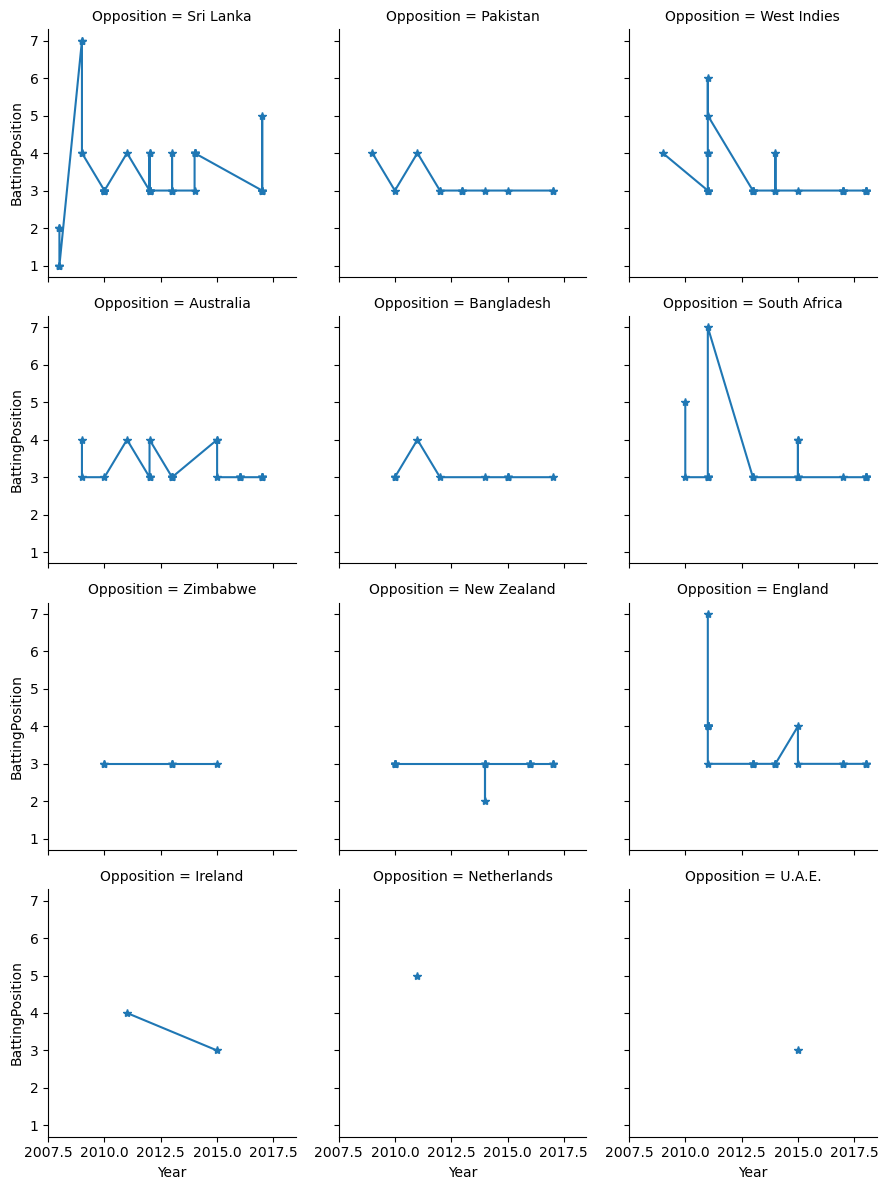

In [43]:
g=sns.FacetGrid(mydata,col='Opposition',col_wrap=3,height=3)
g = g.map(plt.plot,'Year','BattingPosition',marker='*')
plt.show()